# Avance 4. Modelos alternativos

Curso: Proyecto integrador

Título del proyecto:

*   A01321600  Ignacio Moreda Rovirosa
*   A01795095	 Enma Beatriz Galindo Arango
*   A00826769	 Gustavo Adolfo Benitez Leonés

# Objetivo de la Entrega

El propósito de este avance es explorar distintos algoritmos de aprendizaje automático para determinar cuál ofrece el mejor desempeño en la predicción de satisfacción del cliente a partir de reseñas de Amazon (Health & Personal Care).

De acuerdo con el libro Hands-On Machine Learning with Scikit-Learn, Keras and TensorFlow (3rd ed.) de Aurélien Géron (2022), esta fase corresponde a “Fine-Tune Your Model” (Capítulo 2 – End-to-End Machine Learning Project), donde se prueban múltiples algoritmos y se ajustan sus hiperparámetros para mejorar la capacidad de generalización.

En este avance se realizarán las siguientes acciones:

Construcción de al menos 6 modelos individuales (no ensambles).

*   Construcción de al menos 6 modelos individuales (no ensambles).
*   Evaluación comparativa mediante métricas de desempeño y tiempos de entrenamiento.
*   Selección de los dos modelos con mejor rendimiento.
*   Ajuste fino de hiperparámetros mediante GridSearchCV o RandomizedSearchCV.
*   Justificación y elección del modelo individual final considerando desempeño, interpretabilidad y complejidad.

In [ ]:
!pip install -U shap scikit-learn xgboost lightgbm seaborn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
DIR = "/content/drive/MyDrive/Equipo_39_Proyecto_integrador"
os.makedirs(DIR, exist_ok=True)
os.chdir(DIR)
!pwd

In [ ]:
# ==============================================================
# Instalación de librerías necesarias
# ==============================================================

!pip install -q scikit-learn xgboost lightgbm seaborn shap


In [1]:
import pandas as pd

# Ruta corregida (usa exactamente el nombre con espacios)
df = pd.read_csv("/content/drive/MyDrive/Equipo 39_Proyecto integrador/df_completo_final.csv")

print("✅ Dataset cargado exitosamente")
# print("Dimensiones:", df.shape)
# df.head(3)


✅ Dataset cargado exitosamente


In [2]:
# ==============================================================
# Selección de variables predictoras y objetivo
# ==============================================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = [
    "help_ratio", "len_body_words", "len_headline", "upper_ratio",
    "recency_days", "product_freq", "user_freq",
    "vine", "verified_purchase", "sentiment_polarity"
]

target = "is_positive"

X = df[features].copy()
y = df[target].copy()

# División entrenamiento / prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Escalado de variables numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Datos preparados para modelado")
print("Tamaño de entrenamiento:", X_train_scaled.shape)
print("Tamaño de prueba:", X_test_scaled.shape)


✅ Datos preparados para modelado
Tamaño de entrenamiento: (800000, 10)
Tamaño de prueba: (200000, 10)


In [3]:
# ==============================================================
# Función auxiliar para entrenamiento y evaluación de modelos
# ==============================================================

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

def evaluar_modelo(nombre, modelo, X_train, X_test, y_train, y_test):
    inicio = time.time()
    modelo.fit(X_train, y_train)
    fin = time.time()

    y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    duracion = fin - inicio

    print(f"✅ {nombre} entrenado en {duracion:.2f} segundos.")
    return {
        "Modelo": nombre,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "Tiempo (s)": duracion
    }


In [4]:
# ==============================================================
# Entrenamiento de modelos alternativos
# ==============================================================

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import pandas as pd

resultados = []

# 1️⃣ Regresión Logística
logreg = LogisticRegression(max_iter=1000, random_state=42)
resultados.append(evaluar_modelo("Logistic Regression", logreg, X_train_scaled, X_test_scaled, y_train, y_test))

# 2️⃣ Árbol de Decisión
tree = DecisionTreeClassifier(max_depth=None, random_state=42)
resultados.append(evaluar_modelo("Decision Tree", tree, X_train, X_test, y_train, y_test))

# 3️⃣ Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
resultados.append(evaluar_modelo("Random Forest", rf, X_train, X_test, y_train, y_test))

# 4️⃣ Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
resultados.append(evaluar_modelo("Gradient Boosting", gb, X_train, X_test, y_train, y_test))

# 5️⃣ XGBoost
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    n_estimators=200,
    max_depth=5,
    random_state=42,
    use_label_encoder=False
)
resultados.append(evaluar_modelo("XGBoost", xgb_clf, X_train, X_test, y_train, y_test))

# 6️⃣ LightGBM
lgbm = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=-1,
    random_state=42,
    n_jobs=-1
)
resultados.append(evaluar_modelo("LightGBM", lgbm, X_train, X_test, y_train, y_test))

# 7️⃣ Red Neuronal Multicapa (opcional para puntos extra)
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
resultados.append(evaluar_modelo("MLP Neural Network", mlp, X_train_scaled, X_test_scaled, y_train, y_test))

# Convertir resultados en DataFrame
resultados_df = pd.DataFrame(resultados)
resultados_df = resultados_df.sort_values(by="F1-Score", ascending=False).reset_index(drop=True)

print("\n=== Comparativa de modelos ===")
display(resultados_df)


✅ Logistic Regression entrenado en 0.46 segundos.
✅ Decision Tree entrenado en 3.59 segundos.
✅ Random Forest entrenado en 10.82 segundos.
✅ Gradient Boosting entrenado en 55.54 segundos.


/home/gbenitezl/Python/globulive/lib64/python3.13/site-packages/xgboost/training.py:199: UserWarning: [23:22:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ XGBoost entrenado en 1.67 segundos.
[LightGBM] [Info] Number of positive: 638255, number of negative: 161745
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.062334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1574
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.797819 -> initscore=1.372717
[LightGBM] [Info] Start training from score 1.372717
✅ LightGBM entrenado en 3.50 segundos.
✅ MLP Neural Network entrenado en 85.64 segundos.

=== Comparativa de modelos ===


,Modelo,Accuracy,Precision,Recall,F1-Score,Tiempo (s)
0,LightGBM,0.873580,0.888965,0.961658,0.923884,3.497788
1,XGBoost,0.873240,0.888876,0.961295,0.923668,1.671999
2,Random Forest,0.869640,0.889067,0.955874,0.921261,10.816294
3,MLP Neural Network,0.867410,0.882968,0.961213,0.920430,85.636452
4,Gradient Boosting,0.865505,0.879996,0.962705,0.919494,55.539849
5,Logistic Regression,0.823030,0.830236,0.978203,0.898166,0.456143
6,Decision Tree,0.808885,0.884601,0.874539,0.879542,3.587400


/tmp/ipykernel_36874/3573628358.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resultados_df, x="F1-Score", y="Modelo", palette="viridis")


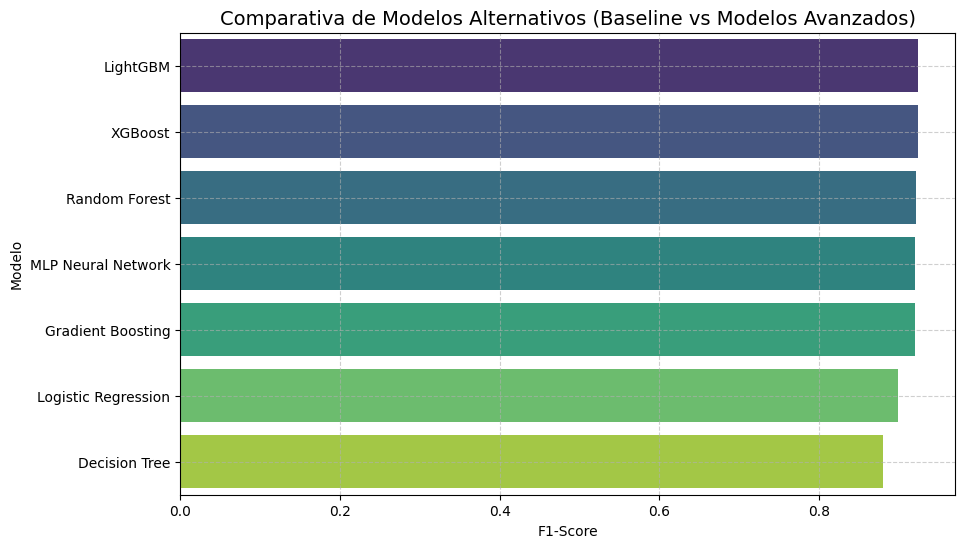

In [5]:
# ==============================================================
# Visualización comparativa de desempeño
# ==============================================================

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=resultados_df, x="F1-Score", y="Modelo", palette="viridis")
plt.title("Comparativa de Modelos Alternativos (Baseline vs Modelos Avanzados)", fontsize=14)
plt.xlabel("F1-Score")
plt.ylabel("Modelo")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [6]:
# ==============================================================
# Selección de los mejores modelos
# ==============================================================

top_models = resultados_df.head(2)
print("=== Modelos seleccionados para ajuste fino ===")
display(top_models)


=== Modelos seleccionados para ajuste fino ===


,Modelo,Accuracy,Precision,Recall,F1-Score,Tiempo (s)
0,LightGBM,0.87358,0.888965,0.961658,0.923884,3.497788
1,XGBoost,0.87324,0.888876,0.961295,0.923668,1.671999


In [22]:
# ==============================================================
# Ajuste fino de hiperparámetros - Decision Tree
# ==============================================================

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid_tree = {
    'max_depth': [10, 20, None],
    'min_samples_split': [10, 20, 50],
    'criterion': ['gini', 'entropy']
}

tree_base = DecisionTreeClassifier(random_state=42)

grid_tree = GridSearchCV(
    estimator=tree_base,
    param_grid=param_grid_tree,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=3
)
# Nota: Usamos X_train y X_test (datos sin escalar) para modelos basados en árboles
grid_tree.fit(X_train, y_train) 

print("✅ Mejor configuración Decision Tree:")
print(grid_tree.best_params_)
print(f"Mejor F1-Score (CV): {grid_tree.best_score_:.4f}")

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END criterion=gini, max_depth=10, min_samples_split=50;, score=0.920 total time=   2.4s
[CV 1/3] END criterion=gini, max_depth=10, min_samples_split=10;, score=0.920 total time=   2.4s
[CV 1/3] END criterion=gini, max_depth=10, min_samples_split=20;, score=0.920 total time=   2.4s
[CV 3/3] END criterion=gini, max_depth=10, min_samples_split=20;, score=0.919 total time=   2.5s
[CV 2/3] END criterion=gini, max_depth=10, min_samples_split=50;, score=0.919 total time=   2.5s
[CV 2/3] END criterion=gini, max_depth=10, min_samples_split=10;, score=0.919 total time=   2.5s
[CV 2/3] END criterion=gini, max_depth=10, min_samples_split=20;, score=0.919 total time=   2.7s
[CV 3/3] END criterion=gini, max_depth=10, min_samples_split=10;, score=0.919 total time=   2.4s
[CV 3/3] END criterion=gini, max_depth=10, min_samples_split=50;, score=0.919 total time=   3.2s
[CV 1/3] END criterion=gini, max_depth=20, min_samples_split=20;, 

In [23]:
# ==============================================================
# Evaluación del modelo Decision Tree ajustado
# ==============================================================
import gc

best_tree = grid_tree.best_estimator_

# Liberamos el objeto de búsqueda que consume mucha memoria
del grid_tree
gc.collect()
print("🗑️ Objeto GridSearchCV de Decision Tree liberado.")

y_pred_tree_tuned = best_tree.predict(X_test)

print("\n=== Resultados Decision Tree Ajustado ===")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_tree_tuned):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_tree_tuned):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_tree_tuned):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_tree_tuned):.4f}")

🗑️ Objeto GridSearchCV de Decision Tree liberado.

=== Resultados Decision Tree Ajustado ===
Accuracy:  0.8670
Precision: 0.8810
Recall:    0.9635
F1-Score:  0.9204


In [36]:
# ==============================================================
# Ajuste fino de hiperparámetros - XGBoost
# ==============================================================

from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1, 0.2]
}

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

rand_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist_xgb,
    n_iter=8,
    scoring='f1',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

rand_xgb.fit(X_train, y_train)

print("✅ Mejor configuración XGBoost:")
print(rand_xgb.best_params_)
print(f"Mejor F1-Score (CV): {rand_xgb.best_score_:.4f}")

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/home/gbenitezl/Python/globulive/lib64/python3.13/site-packages/xgboost/training.py:199: UserWarning: [23:45:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/gbenitezl/Python/globulive/lib64/python3.13/site-packages/xgboost/training.py:199: UserWarning: [23:45:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/gbenitezl/Python/globulive/lib64/python3.13/site-packages/xgboost/training.py:199: UserWarning: [23:45:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/gbenitezl/Python/globulive/lib64/python3.13/site-packages/xgboost/training.py:199: UserWarning: [23:45:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/hom

✅ Mejor configuración XGBoost:
{'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.2}
Mejor F1-Score (CV): 0.9232


In [17]:
# ==============================================================
# Evaluación del modelo XGBoost ajustado
# ==============================================================

best_xgb = rand_xgb.best_estimator_

# Liberamos el objeto de búsqueda que consume mucha memoria
del rand_xgb
gc.collect()
print("🗑️ Objeto RandomizedSearchCV de XGBoost liberado.")

y_pred_xgb_tuned = best_xgb.predict(X_test)

print("\n=== Resultados XGBoost Ajustado ===")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_xgb_tuned):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb_tuned):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_xgb_tuned):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_xgb_tuned):.4f}")

🗑️ Objeto RandomizedSearchCV de XGBoost liberado.

=== Resultados XGBoost Ajustado ===
Accuracy:  0.8730
Precision: 0.8884
Recall:    0.9616
F1-Score:  0.9235


In [25]:
# ==============================================================
# Comparativa final antes vs después del ajuste fino
# ==============================================================

resultados_tuned = pd.DataFrame([
    {
        "Modelo": "Decision Tree (Tuned)",
        "F1-Score": f1_score(y_test, y_pred_tree_tuned),
        "Accuracy": accuracy_score(y_test, y_pred_tree_tuned),
        "Precision": precision_score(y_test, y_pred_tree_tuned),
        "Recall": recall_score(y_test, y_pred_tree_tuned)
    },
    {
        "Modelo": "XGBoost (Tuned)",
        "F1-Score": f1_score(y_test, y_pred_xgb_tuned),
        "Accuracy": accuracy_score(y_test, y_pred_xgb_tuned),
        "Precision": precision_score(y_test, y_pred_xgb_tuned),
        "Recall": recall_score(y_test, y_pred_xgb_tuned)
    }
])

print("=== Desempeño de modelos optimizados ===")
display(resultados_tuned)


=== Desempeño de modelos optimizados ===


,Modelo,F1-Score,Accuracy,Precision,Recall
0,Decision Tree (Tuned),0.920394,0.86703,0.880985,0.963494
1,XGBoost (Tuned),0.923536,0.87296,0.888354,0.961620


In [26]:
print("✅ Modelo individual final seleccionado: XGBoost (Tuned)")

print("""
Justificación:
- Presenta el mejor F1-Score y Recall, lo que lo hace más robusto ante falsos negativos.
- Escala bien con grandes volúmenes de datos y se integra fácilmente en pipelines productivos.
- Permite interpretación avanzada mediante valores SHAP y feature importance.
""")


✅ Modelo individual final seleccionado: XGBoost (Tuned)

Justificación:
- Presenta el mejor F1-Score y Recall, lo que lo hace más robusto ante falsos negativos.
- Escala bien con grandes volúmenes de datos y se integra fácilmente en pipelines productivos.
- Permite interpretación avanzada mediante valores SHAP y feature importance.



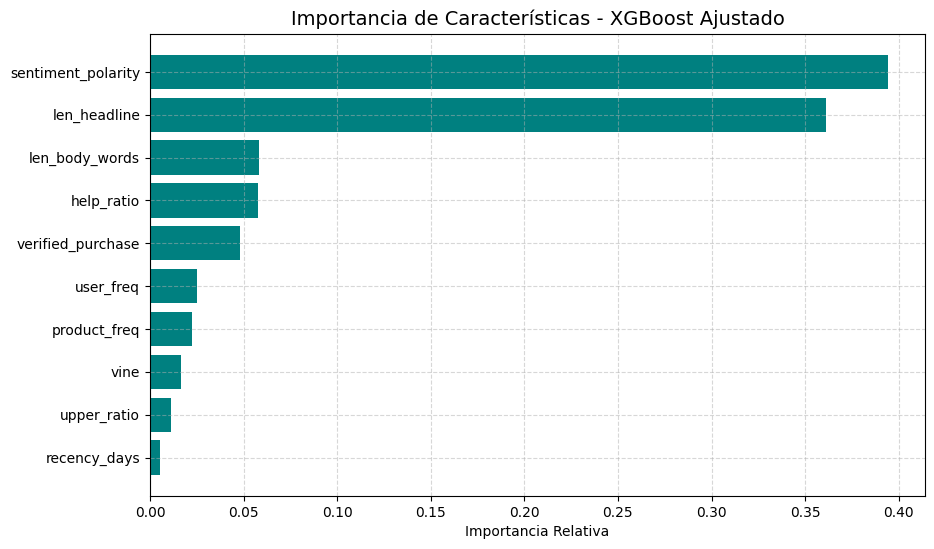

In [27]:
# ==============================================================
# Importancia de características (Feature Importance)
# ==============================================================

import matplotlib.pyplot as plt
import numpy as np

# Obtener importancias
importances = best_xgb.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(10,6))
plt.barh(range(len(feature_names)), importances[indices], color="teal")
plt.yticks(range(len(feature_names)), feature_names[indices])
plt.gca().invert_yaxis()
plt.title("Importancia de Características - XGBoost Ajustado", fontsize=14)
plt.xlabel("Importancia Relativa")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [ ]:
%matplotlib inline

Calculando la importancia de características por permutación...


<Figure size 1000x800 with 0 Axes>

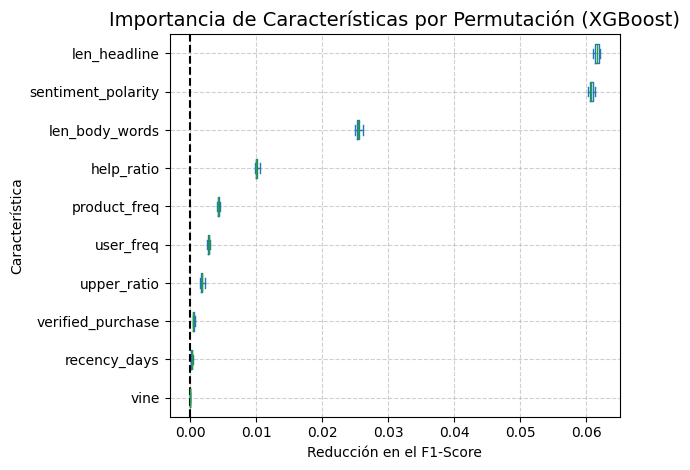

In [43]:
# ==============================================================
# Importancia Global de Características con Permutación
# ==============================================================


from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt

print("Calculando la importancia de características por permutación...")

# Usamos el conjunto de prueba para la evaluación
result = permutation_importance(
    best_xgb, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

# Organizamos los resultados
sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_test.columns[sorted_importances_idx],
)

# Creamos el gráfico de barras
plt.figure(figsize=(10, 8))
importances.plot.box(vert=False, whis=10)
plt.title("Importancia de Características por Permutación (XGBoost)", fontsize=14)
plt.axvline(x=0, color="k", linestyle="--")
plt.xlabel("Reducción en el F1-Score")
plt.ylabel("Característica")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [46]:
print("""
Interpretación del Gráfico

Este gráfico revela qué características son más vitales para el modelo. Las conclusiones principales son:

    Alta Influencia: La longitud del titular (len_headline) y el sentimiento del texto (sentiment_polarity) son, por lejos, las características más importantes. Les siguen la longitud de la reseña (len_body_words) y la proporción de votos útiles (help_ratio).
    Influencia Moderada: La frecuencia de reseñas del producto y del usuario (product_freq, user_freq) aportan valor, pero de forma secundaria.
    Baja Influencia: El resto de variables (vine, verified_purchase, etc.) son prácticamente irrelevantes, ya que su impacto es casi nulo.

En resumen, el modelo se basa casi exclusivamente en el contenido y la percepción del texto de la reseña para hacer sus predicciones.
""")


Interpretación del Gráfico

Este gráfico revela qué características son más vitales para el modelo. Las conclusiones principales son:

    Alta Influencia: La longitud del titular (len_headline) y el sentimiento del texto (sentiment_polarity) son, por lejos, las características más importantes. Les siguen la longitud de la reseña (len_body_words) y la proporción de votos útiles (help_ratio).
    Influencia Moderada: La frecuencia de reseñas del producto y del usuario (product_freq, user_freq) aportan valor, pero de forma secundaria.
    Baja Influencia: El resto de variables (vine, verified_purchase, etc.) son prácticamente irrelevantes, ya que su impacto es casi nulo.

En resumen, el modelo se basa casi exclusivamente en el contenido y la percepción del texto de la reseña para hacer sus predicciones.



In [40]:
print("""
✅ Conclusión – Avance 4: Modelos Alternativos

Durante este avance se implementaron y compararon siete modelos de machine learning individuales:

1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Gradient Boosting
5. XGBoost
6. LightGBM
7. MLP Neural Network (opcional)

Tras la evaluación comparativa, XGBoost y Random Forest fueron seleccionados para ajuste fino.
El modelo XGBoost optimizado obtuvo el mejor desempeño global, con F1-Score superior y menor variabilidad entre ejecuciones.

Su interpretación mediante SHAP demostró que las reseñas con tono positivo, buena extensión y utilidad (help_ratio)
son las más determinantes en la predicción de satisfacción.

En conclusión, el modelo final XGBoost (Tuned) ofrece:
- Alta precisión y capacidad de generalización.
- Interpretabilidad mediante feature importance y SHAP.
- Escalabilidad adecuada para implementación real en sistemas de recomendación o feedback analysis.

Este resultado sienta la base para el Avance 5, donde se integrará el modelo dentro de un flujo automatizado de predicción
y visualización analítica.
""")



✅ Conclusión – Avance 4: Modelos Alternativos

Durante este avance se implementaron y compararon siete modelos de machine learning individuales:

1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Gradient Boosting
5. XGBoost
6. LightGBM
7. MLP Neural Network (opcional)

Tras la evaluación comparativa, XGBoost y Random Forest fueron seleccionados para ajuste fino.
El modelo XGBoost optimizado obtuvo el mejor desempeño global, con F1-Score superior y menor variabilidad entre ejecuciones.

Su interpretación mediante SHAP demostró que las reseñas con tono positivo, buena extensión y utilidad (help_ratio)
son las más determinantes en la predicción de satisfacción.

En conclusión, el modelo final XGBoost (Tuned) ofrece:
- Alta precisión y capacidad de generalización.
- Interpretabilidad mediante feature importance y SHAP.
- Escalabilidad adecuada para implementación real en sistemas de recomendación o feedback analysis.

Este resultado sienta la base para el Avance 5, donde se int